# PRACTICA 1 - OROZCO LOMELI DANIEL URIEL

In [15]:
import sys
sys.path.append('tsp')
import os
from os import path, listdir
from tsp import benchmarks,metrics,tspplot
from tsp.tspobject import TSPObject

import random
import copy
import numpy as np


benchmark_path = r'benchmarks'

# Algoritmo ACO (OPTIMIZACION POR COLONIA DE HORMIGAS)

## Clase Hormiga

In [1]:
class Hormiga:
    def __init__(self,nombre,tsp_object):
        self.feromonas = copy.deepcopy(tsp_object._M)
        self.visitados = []
        self.nombre = nombre

    def DFeromonas(self,Q,L,N_ciudades): #Depositar feromonas
        for i in range(1,N_ciudades + 1):
            for j in range(1,N_ciudades + 1):
                if i!=j:
                    self.feromonas[str(i)][str(j)] = Q/L

    def IDSelfFeromonas(self,N_ciudades): #Inicializar feromonas
        for i in range(1,N_ciudades + 1):
            for j in range(1,N_ciudades + 1):
                if i!=j:
                    self.feromonas[str(i)][str(j)] = 0

## Funciones

In [17]:
def select(prob):
    value = max(prob)
    return prob.index(value)

def Fvisibilidad(tsp_object,N_ciudades):
    visibilidad = copy.deepcopy(tsp_object._M)
    for i in range(1,N_ciudades + 1):
        for j in range(1,N_ciudades + 1):
            if i!=j:
                visibilidad[str(i)][str(j)] = 1/visibilidad[str(i)][str(j)]  #la inversa de las distancias
    return visibilidad

def Fprobabilidad(alpha,beta,hormiga_k,tsp_data_D,visibilidad,N_ciudades,feromonas_colonia):
    i = hormiga_k.visitados[-1]
    numerador = []
    diccionarios = {} 
    for j in range(1,N_ciudades + 1):

        if j not in hormiga_k.visitados:
            operacion = (feromonas_colonia[str(i)][str(j)]**alpha)*(visibilidad[str(i)][str(j)]**beta)
            numerador.append(operacion)
            diccionarios[j] = operacion
        else:
            diccionarios[j] = 0

    den = sum(numerador)
    prob = [e/den for e in numerador]
    indice = select(prob)
    ayuda = [(k,v) for k, v in diccionarios.items() if v == numerador[indice]]
    return ayuda[0][0]


def IFeromonas(tsp_object,N_ciudades): #Inicializar feromonas
    feromonas = copy.deepcopy(tsp_object._M)
    for i in range(1,N_ciudades + 1):
        for j in range(1,N_ciudades + 1):
            if i!=j:
                feromonas[str(i)][str(j)] = np.random.sample()*10
    
    return feromonas


def EFeromonas(feromonas,p,colonia,N_ciudades): #Evaporar feromonas
    #p parametro de actualizacion 0 <= p <= 1 
    for i in range(1,N_ciudades + 1):
            for j in range(1,N_ciudades + 1):
                if i!=j:
                    feromonas[str(i)][str(j)] = (1-p) * feromonas[str(i)][str(j)] + sum(hormiga.feromonas[str(i)][str(j)] for hormiga in colonia if hormiga.feromonas)
    return feromonas

In [20]:
def ACO(O,nodos):
    ciudades = nodos
    visibilidad = Fvisibilidad(O,ciudades) #la inversa de las distancias  
    maxit = 10 #numero de iteraciones
    g = 0 #generacion
    visitado = [] #ciudades visitadas
    alpha = 6 #variable para seleccion de camino
    beta = 8 #variable para seleccion de camino
    Q = 11 #variable para depositar feromonas
    solucioneschidas = []
    feromonas_colonia = IFeromonas(O,ciudades)
    while g < maxit:
        print("Colonia",g+1)
        #Creacion de hormigas
        colonia = [Hormiga(i,O) for i in range(50)] #numero de hormigas en la colonia
        i = 0 #iterador para nombres
        g+=1
        soluciones = []
        cinicial = random.randint(1,ciudades)
        for hormiga in colonia:
            #print("hormiga",hormiga.nombre+1)
            hormiga.visitados.append(cinicial)

            #Encontrar solucion
            while len(hormiga.visitados) < ciudades:
                hormiga.visitados.append(Fprobabilidad(alpha,beta,hormiga,O._M,visibilidad,ciudades,feromonas_colonia))
            #print(hormiga.visitados)

            #Depositar Feromonas
            tour = [str(ciudad) for ciudad in hormiga.visitados]
            L = O.evaluate_tour(tour)
            soluciones.append((L,tour))
            hormiga.IDSelfFeromonas(ciudades)
            hormiga.DFeromonas(Q,L,ciudades)

            #Evaporar feromonas
            p = np.random.sample() # parametro de control de evaporacion
            feromonas_colonia = EFeromonas(feromonas_colonia,p,colonia,ciudades)
            i+=1

        solucioneschidas.append(min(soluciones))


    return min(solucioneschidas)[1]

# Encontrar una solución a TSP

Colonia 1
Colonia 2
Colonia 3
Colonia 4
Colonia 5
Colonia 6
Colonia 7
Colonia 8
Colonia 9
Colonia 10


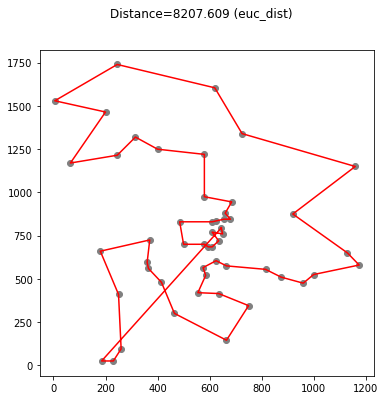

In [21]:
tsp_data = path.join(benchmark_path,'berlin52.tsp')

#Crear Objeto TSP
O = TSPObject(tsp_data,metrics.euc_dist)

#Crear Matriz de Distancias
O.M()

#Crear variable que contenga el numero de nodos
nodos = len(O.V)

tspplot.plot_tsp(O,ACO(O,nodos),figsize=(6,6))